In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
vancouver = pd.read_csv("crime.csv")

In [3]:
vancouver.drop(['MINUTE'], axis=1, inplace=True)
vancouver['NEIGHBOURHOOD'].fillna('N/A', inplace=True)

In [4]:
vancouver['DATE'] = pd.to_datetime({'year':vancouver['YEAR'], 'month':vancouver['MONTH'], 'day':vancouver['DAY']})
vancouver['Day of Week'] = vancouver['DATE'].dt.dayofweek

In [5]:
vancouver.index = pd.DatetimeIndex(vancouver['DATE'])

In [6]:
vancouver = vancouver[vancouver['DATE'] < '2017-01-01']
vancouver.drop(['DATE'], axis=1, inplace=True)

In [7]:
vancouver.head()

,TYPE,YEAR,MONTH,DAY,HOUR,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,Day of Week
DATE,,,,,,,,,,,,
2003-05-12,Other Theft,2003,5,12,16.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,0
2003-05-07,Other Theft,2003,5,7,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2
2003-04-23,Other Theft,2003,4,23,16.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2
2003-04-20,Other Theft,2003,4,20,11.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,6
2003-04-12,Other Theft,2003,4,12,17.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,5


In [8]:
vancouver['TYPE'].value_counts()

Theft from Vehicle                                        166738
Mischief                                                   67832
Break and Enter Residential/Other                          59558
Offence Against a Person                                   52537
Other Theft                                                49301
Theft of Vehicle                                           37663
Break and Enter Commercial                                 32734
Theft of Bicycle                                           24744
Vehicle Collision or Pedestrian Struck (with Injury)       21230
Vehicle Collision or Pedestrian Struck (with Fatality)       249
Homicide                                                     209
Name: TYPE, dtype: int64

In [9]:
crimes_year = vancouver.groupby(['YEAR']).count()['TYPE']

Text(0.5, 0, 'Year')

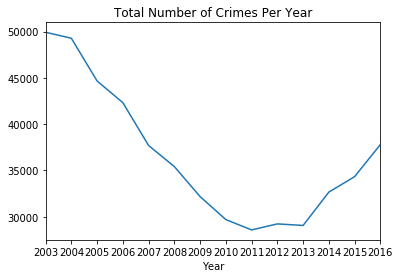

In [10]:
crimes_year.plot()
plt.title("Total Number of Crimes Per Year")
plt.xticks(np.arange(2003,2017, step=1))
plt.xlabel("Year")

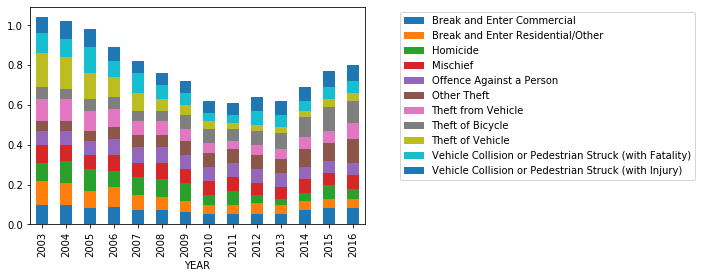

In [11]:
crime_type_by_year = vancouver.groupby(["TYPE", "YEAR"]).count()['MONTH']
crime_type_by_year_df = crime_type_by_year.unstack("TYPE")
w = vancouver.groupby(['TYPE']).count()
div_vec = w['YEAR'] 
crime_type_prop = crime_type_by_year_df.div(div_vec).round(2)
crime_type_prop.stack()

crime_type_prop.plot(kind='bar', stacked=True).legend(loc='upper right', bbox_to_anchor=(2,1))


#crime_type_by_year_df = crime_type_by_year.unstack()
#w = vancouver.groupby(['YEAR']).count()
#div_vec = w['TYPE'] 
#crime_type_prop = crime_type_by_year_df.div(div_vec).round(2)
#crime_type_prop.plot(kind='bar', stacked=True)
#vancouver['TYPE'].value_counts()

#can't quite get the code right, want it to be like the last midterm question, but it is a cool way to represent the line graph
#shown above

In [12]:
days = vancouver.groupby(["DATE"]).count()['TYPE']

daily_counts = vancouver.groupby(['TYPE','YEAR', 'MONTH', 'DAY'])['HOUR'].count().unstack("TYPE")

mischief_days = daily_counts['Mischief']
break_comm_days = daily_counts['Break and Enter Commercial']
break_res_days = daily_counts['Break and Enter Residential/Other']
homicide_days = vancouver[vancouver.TYPE == 'Homicide'].groupby("DATE").count()['TYPE']
person_off_days = vancouver[vancouver.TYPE == 'Offence Against a Person'].groupby("DATE").count()['TYPE']
other_theft_days = daily_counts['Other Theft']
theft_ve_days = daily_counts['Theft from Vehicle']
theft_bi_days = daily_counts['Theft of Bicycle']
theft_car_days = daily_counts['Theft of Vehicle']

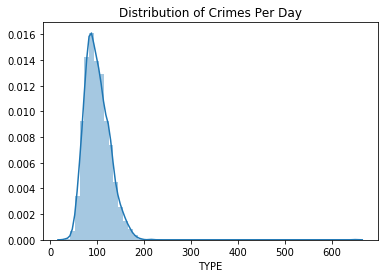

In [13]:
sns.distplot(days, bins=60)
plt.title("Distribution of Crimes Per Day");

This data seems to be approximately Normally distributed, with a mean of about 100 crimes per day. 

However, There was a day with 600+ crimes? Which day was it?

In [14]:
heavy_crime_days = days[days >= 300]
print(heavy_crime_days)

DATE
2011-06-15    649
Name: TYPE, dtype: int64


June 15th, 2011 was the day of the famous Stanley Cup riots, where angry Canucks fans rioted in the streets after allegedly 
throwing the Stanley Cup finals. These riots created outliers in people arrested for Mischief, as well as Breaking and Entering 
into Commercial Areas, causing an overall massive outlier in the city's crimes per day total (more than 400 more crimes than the next-closest day).

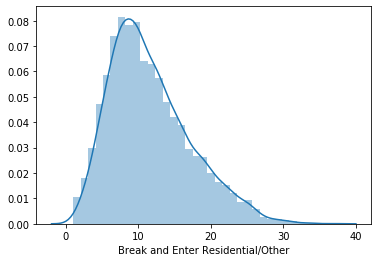

In [23]:
sns.distplot(break_res_days, bins=35);

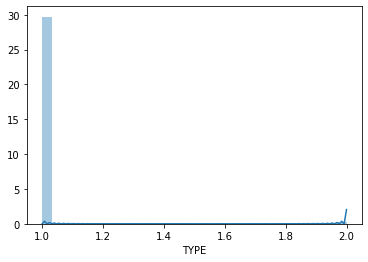

In [16]:
sns.distplot(homicide_days, bins=30);  #wtf?

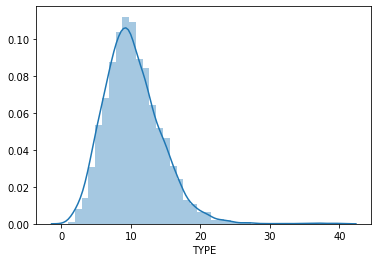

In [17]:
sns.distplot(person_off_days, bins=40);

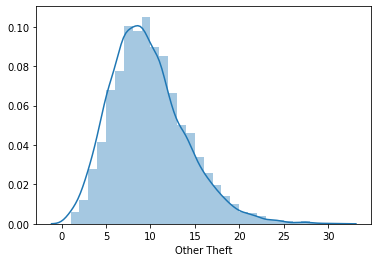

In [18]:
sns.distplot(other_theft_days, bins=30);

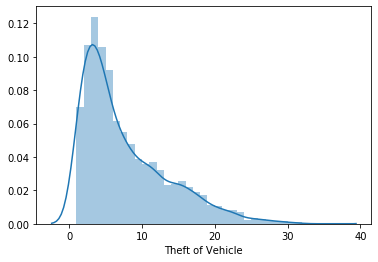

In [19]:
sns.distplot(theft_car_days, bins=35);

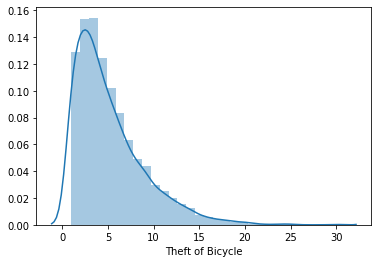

In [20]:
sns.distplot(theft_bi_days, bins=30);

Most Crime per day totals seem to be Normally distributed, except for the Homicide chart (wtf), and the Car and Bike theft
charts, which have more at 0 then kinda flare outward (forget the name of the dist)

# Individual Outlier Analysis

## Mischief
"In Canada, mischief is a criminal offence that refers to the wilful or reckless destruction of another person's property, or the interference with another person's property. Mischief is often the charge that will be laid following an act of vandalism."

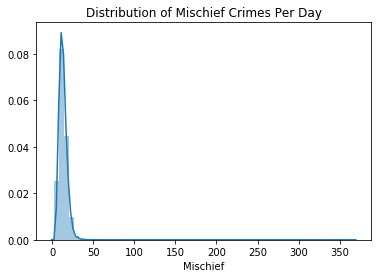

In [21]:
sns.distplot(mischief_days, bins=60)
plt.title("Distribution of Mischief Crimes Per Day");

This data is approximately Normal, with a mean around 20 mischief arrests per day. 

There appears to be one massive outlier aorund 350, but let's check for others to be sure.

In [25]:
mischief_days[(np.abs(stats.zscore(mischief_days) > 5))]

YEAR  MONTH  DAY
2008  3      12     120.0
2011  6      15     367.0
Name: Mischief, dtype: float64

Oh! It looks like there's another day with a massive amount of Mischief crimes.

Let's compare these days to the rest of their weeks to see if they were an explosion of unrest, or just anomalies

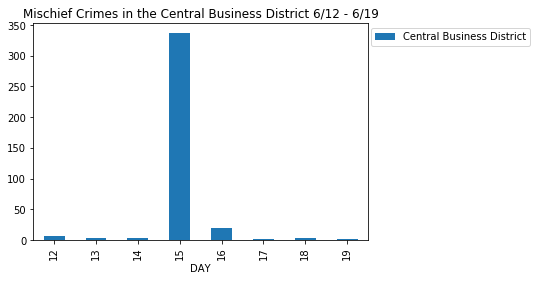

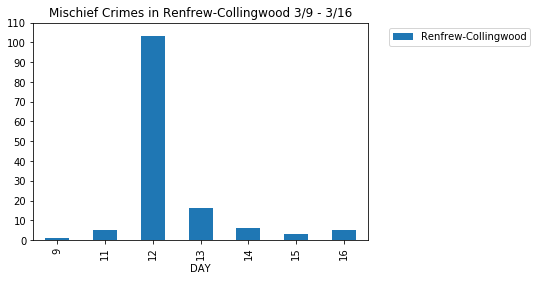

In [26]:
cbd = vancouver[vancouver['YEAR'] == 2011]
cbd1 = cbd[cbd['NEIGHBOURHOOD'] == 'Central Business District']
cbd2 = cbd1[cbd1['MONTH'] == 6]
cbd3 = cbd2[cbd2['DAY'].isin([12,13,14,15,16,17,18,19])]
cbd4 = cbd3[cbd3['TYPE'] == 'Mischief']
mischief_cbd_in_range = cbd4.groupby(['DAY', 'NEIGHBOURHOOD']).count()['TYPE']
mischief_cbd_in_range.unstack().plot(kind='bar')
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))
plt.title("Mischief Crimes in the Central Business District 6/12 - 6/19");

rc = vancouver[vancouver['YEAR'] == 2008]
rc1 = rc[rc['NEIGHBOURHOOD'] == 'Renfrew-Collingwood']
rc2 = rc1[rc1['MONTH'] == 3]
rc3 = rc2[rc2['DAY'].isin([9,10,11,12,13,14,15,16])]
rc4 = rc3[rc3['TYPE'] == 'Mischief']
mischief_rc_in_range = rc4.groupby(['DAY', 'NEIGHBOURHOOD']).count()['TYPE']
mischief_rc_in_range.unstack().plot(kind='bar') 
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))
plt.title("Mischief Crimes in Renfrew-Collingwood 3/9 - 3/16");
plt.yticks(np.arange(0,120, step=10));


It looks like the days where there were lots of Mischief crimes generally came out of nowhere, so to speak, but the elevated rates of Mischief tended to stick around for a day or 2 after, reflecting either heightened policing or tension still in the area.

While the spike in Mischief crimes in the Central Business District can be easily explained by the Stanley Cup Riots, I 
couldn't find a single mention of the 100+ mischief arrests in Renfrew-Collingwood on March 12th, 2008. Since there was an elevated number of Mischief crimes the following day, I don't believe that the 100+ outlier was a reporting error by the Vancouver Police.

Next, we'll compare how these outliers affect the daily Mischief arrest rates of their respective neighborhoods, and how the rates look once the outliers are removed.

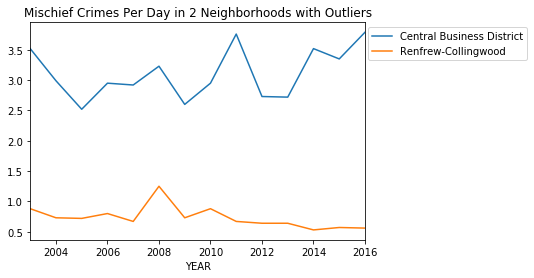

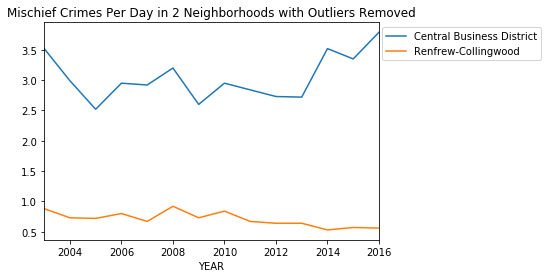

In [90]:
mischief = vancouver[vancouver['TYPE'] == 'Mischief']
mischief_days_by_hood = mischief.groupby(['NEIGHBOURHOOD', 'YEAR']).count()
mischief_per_day = mischief_days_by_hood.unstack('NEIGHBOURHOOD')['TYPE'].div(365.25).round(2)
mischief_per_day[['Central Business District', 'Renfrew-Collingwood']].plot()
plt.title("Mischief Crimes Per Day in 2 Neighborhoods with Outliers")
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1));

mischief_a_day = mischief.groupby(['NEIGHBOURHOOD', 'DAY', 'MONTH', 'YEAR'])['TYPE']
mischief_a_day_df = mischief_a_day.count().unstack('NEIGHBOURHOOD').fillna(0)
mischief_no_outliers =  mischief_a_day_df[(np.abs(stats.zscore(mischief_a_day_df['Central Business District'])) < 5)]
mischief_no_outliers =  mischief_no_outliers[(np.abs(stats.zscore(mischief_no_outliers['Renfrew-Collingwood'])) < 5)]
mischief_no_outliers = mischief_no_outliers.stack().unstack(["YEAR"]).unstack('NEIGHBOURHOOD').sum()

mischief_no_outliers.unstack("NEIGHBOURHOOD")[['Central Business District', 'Renfrew-Collingwood']].div(365.25).round(2).plot()
plt.title("Mischief Crimes Per Day in 2 Neighborhoods with Outliers Removed")
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1));

With the outliers taken out, the graphs more closely resemble the trends given by the Crimes Per Year graph.

## Breaking and Entering (Commercial)



Breaking and Entering into Commerical Buildings was also heavily affected by the Stanley Cup Riots, as many rioting fans
broke into and destroyed businesses downtown. Were there any more significant days where people broke into commercial buildings?

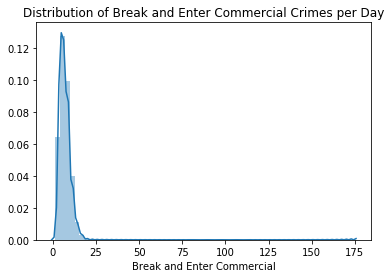

In [28]:
sns.distplot(break_comm_days, bins=60)
plt.title("Distribution of Break and Enter Commercial Crimes per Day");

Breaking and Entering Commercial is distributed normally enough to search for outliers using standard deviation, so I'll do that. 

In [29]:
bcd = vancouver[vancouver.TYPE == 'Break and Enter Commercial'].groupby("DATE").count()['TYPE']
bcd[np.abs(stats.zscore(bcd) > 4)]

DATE
2004-09-16     24
2006-02-03     24
2011-06-15    174
Name: TYPE, dtype: int64

While there were two days with 24 Breaking and Entering (Commercial) crimes, neither are particularly close to the 174 people
arrested for breaking and entering during the 2011 Stanley Cup Riots, so I will be focusing on those. Also, the majority of these Breaking and Entering arrests were made in the Central Business District as a direct result of the riots, so I will be focusing on that neighborhood.

In [30]:
vancouver['2011-06-15'][vancouver['2011-06-15'].TYPE == 'Break and Enter Commercial'].NEIGHBOURHOOD.value_counts()

Central Business District    171
Victoria-Fraserview            1
Fairview                       1
Dunbar-Southlands              1
Name: NEIGHBOURHOOD, dtype: int64

Yeah, 171 people were arrested in the Central Business District for breaking into stores during the riots. Crazy stuff.

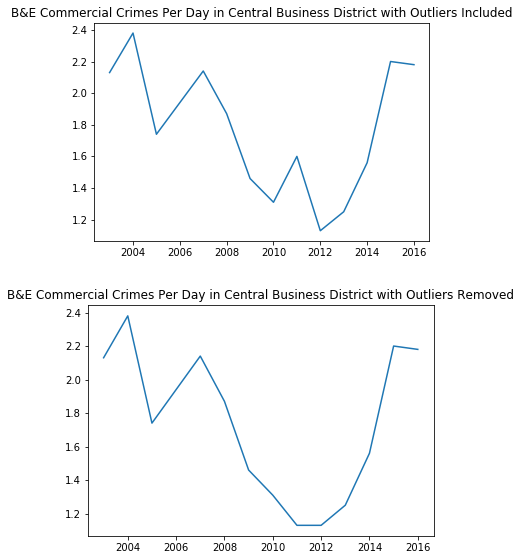

In [31]:
fig = plt.figure()

bec = vancouver[vancouver.TYPE == "Break and Enter Commercial"].groupby(['NEIGHBOURHOOD', 'YEAR', 'MONTH', 'DAY'])['TYPE']
break_comm_df = bec.count().unstack('NEIGHBOURHOOD').fillna(0)
bec_cbd_sum = break_comm_df.stack().unstack("YEAR").unstack("NEIGHBOURHOOD").sum()

ax1=fig.add_subplot(111)
ax1.plot(bec_cbd_sum.unstack("NEIGHBOURHOOD")['Central Business District'].div(365.25).round(2))
plt.title("B&E Commercial Crimes Per Day in Central Business District with Outliers Included")


bec_cbd_no_outliers =  break_comm_df[(np.abs(stats.zscore(break_comm_df['Central Business District'])) < 5)]
bec_cbd_no_outliers_sum = bec_cbd_no_outliers.stack().unstack("YEAR").unstack("NEIGHBOURHOOD").sum()

ax2 = fig.add_axes([0.11, -.9, .8, .8])
ax2.plot(bec_cbd_no_outliers_sum.unstack("NEIGHBOURHOOD")['Central Business District'].div(365.25).round(2))
plt.title("B&E Commercial Crimes Per Day in Central Business District with Outliers Removed");


The exclusion of the Stanley Cup Riots allows us to see that the city's initiative to cut down break-ins from 2007-2012 really 
worked!

## Theft From Vehicle

Next, I'd like to look at how often things were stolen from vehicles.

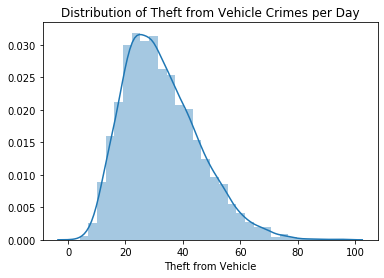

In [32]:
sns.distplot(theft_ve_days, bins=30)
plt.title("Distribution of Theft from Vehicle Crimes per Day");

It looks like there's a day where over 100 people were arrested for stealing from cars. Let's find out when it was!

This data looks almost normally distributed (with a very high number of observations) so I will once again use z-score to find outliers. 

In [33]:
tfv = vancouver[vancouver.TYPE == 'Theft from Vehicle'].groupby("DATE").count()['TYPE']
tfv[np.abs(stats.zscore(tfv) > 4)]

DATE
2003-05-16    95
2003-05-17    86
2004-11-12    92
2004-11-14    87
2005-04-08    95
2006-01-07    86
Name: TYPE, dtype: int64

I guess there weren't any days over 100. It also seems like all of the days with a high number of people stealing from cars occurred before 2010. This reflects the general trend of the crime rate going down before the 2010, possibly due to the Olympics.

Finally, it seems that there was a crime spree in mid-May 2003, as well as one in mid-November 2004, where there were sustained high levels of car thievery.

Also, for once, the spikes in crime were unrelated to the Stanley Cup riots.

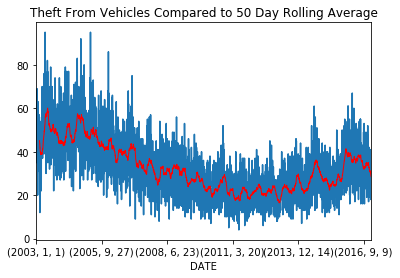

In [91]:
theft_ve_days.plot()
rolling_mean = theft_ve_days.rolling(window=50).mean()
rolling_mean.plot(color='red', linewidth=1)
plt.title("Theft From Vehicles Compared to 50 Day Rolling Average")
plt.xlabel("DATE")
plt.locator_params(axis='x', nbins=10)

The average drops considerably from 2003 to 2011, then rebounds by the middle of the 2010s. This explains why all the outliers I found using z-scores were all from the early-to-mid 2000s.